#### Import packages and read all Json Files

In [1]:
import os
import json
import pandas as pd
mergedRobbery=pd.DataFrame()
mergedDeception=pd.DataFrame()
mergedBurglary=pd.DataFrame()
directory = "E:/drive-download"
all_data = {}

for filename in os.listdir(directory):
    if filename.endswith(".xlsx"):
        file_path = os.path.join(directory, filename)
             
        if filename.startswith("robbery"):
            # print('````````````````````````````````````````````````````')
            # print(file_path)
            rdf = pd.read_excel(file_path,header=None)
            print(mergedRobbery.shape)
            mergedRobbery=pd.concat([rdf,mergedRobbery],axis=0)
        if filename.startswith("burglary"):
            # print('````````````````````````````````````````````````````')
            # print(file_path)
            rdf = pd.read_excel(file_path,header=None)
            print(mergedBurglary.shape)
            mergedBurglary=pd.concat([rdf,mergedBurglary],axis=0)
        if filename.startswith("deception"):
            # print('````````````````````````````````````````````````````')
            # print(file_path)
            rdf = pd.read_excel(file_path,header=None)
            print(mergedDeception.shape)
            mergedDeception=pd.concat([rdf,mergedDeception],axis=0)

        # with open(file_path, "r", encoding="utf-8") as f:
        #     data = json.load(f)
        #     all_data[filename] = data

(0, 0)
(4746, 2)
(9894, 2)
(13445, 2)
(17607, 2)
(22280, 2)
(27985, 2)
(0, 0)
(1421, 2)
(2954, 2)
(4918, 2)
(6364, 2)
(7905, 2)
(9729, 2)
(0, 0)
(5453, 2)
(13938, 2)
(19208, 2)
(23974, 2)
(30286, 2)
(38067, 2)


In [2]:
mergedBurglary.head()
#  set the column names
mergedBurglary.columns=['text','label']

In [3]:
mergedRobbery.columns=['text','label']

In [4]:
mergedBurglary.head()

,text,label
0,-DOCSTART- -X- O O,NaN
1,A/L/1,O
2,is,O
3,a,O
4,duplex,B-LOCATION_TYPE


In [5]:
mergedBurglary.label.value_counts()

O                       28863
I-ENTRY                   680
B-LOST_ITEM_TYPE          428
I-LOST_ITEM_TYPE          255
B-LOCATION_TYPE           156
I-LOCATION_TYPE           153
B-ENTRY                   144
I-VTM_LEFT_HOME_TIME      141
B-RANSACKING              125
B-CCTV_LOCATION           124
I-VTM_RETURN_TIME         120
I-CCTV_LOCATION           119
B-VTM_LEFT_HOME_TIME       84
I-RANSACKING               76
B-LOST_AMOUNT              74
B-VTM_RETURN_TIME          66
B-TOOLS                    54
I-FOOTFINGER_PRINT         36
I-TOOLS                    35
B-FOOTFINGER_PRINT         26
I-APPERANCE                16
B-CCTV_NUMBER_NER          14
I-CCTV_NUMBER_NER          11
B-APPERANCE                 9
I-LOST_AMOUNT               6
B-GENDER                    5
B-NATIVE                    5
B-WEAPON                    3
I_ENTRY                     1
I-VTM_LEFT_HOME_TIM         1
LOST_ITEM_TYPE              1
I-WEAPON                    1
Name: label, dtype: int64

In [6]:
#  READ TEXT WHHERE LABEL IS I_ENTRY:
mergedBurglary[mergedBurglary.label=='I_ENTRY'].text
# mergedBurglary[mergedBurglary.label=='I_ENTRY'].index


1875    pipe
Name: text, dtype: object

In [7]:
#  REPLACE LABEL I_ENTRY WITH I-ENTRY:
mergedBurglary.loc[mergedBurglary.label=='I_ENTRY','label']='I-ENTRY'

In [8]:
mergedBurglary[mergedBurglary.label=='I-VTM_LEFT_HOME_TIM'].text
# mergedBurglary[mergedBurglary.label=='I_ENTRY'].index


4332    same
Name: text, dtype: object

In [9]:
mergedBurglary.label.value_counts()

O                       28863
I-ENTRY                   681
B-LOST_ITEM_TYPE          428
I-LOST_ITEM_TYPE          255
B-LOCATION_TYPE           156
I-LOCATION_TYPE           153
B-ENTRY                   144
I-VTM_LEFT_HOME_TIME      141
B-RANSACKING              125
B-CCTV_LOCATION           124
I-VTM_RETURN_TIME         120
I-CCTV_LOCATION           119
B-VTM_LEFT_HOME_TIME       84
I-RANSACKING               76
B-LOST_AMOUNT              74
B-VTM_RETURN_TIME          66
B-TOOLS                    54
I-FOOTFINGER_PRINT         36
I-TOOLS                    35
B-FOOTFINGER_PRINT         26
I-APPERANCE                16
B-CCTV_NUMBER_NER          14
I-CCTV_NUMBER_NER          11
B-APPERANCE                 9
I-LOST_AMOUNT               6
B-GENDER                    5
B-NATIVE                    5
B-WEAPON                    3
I-VTM_LEFT_HOME_TIM         1
LOST_ITEM_TYPE              1
I-WEAPON                    1
Name: label, dtype: int64

In [10]:
mergedBurglary.head()

,text,label
0,-DOCSTART- -X- O O,NaN
1,A/L/1,O
2,is,O
3,a,O
4,duplex,B-LOCATION_TYPE


In [11]:
#  NAN VALUES:
mergedBurglary.isnull().sum()

text       0
label    173
dtype: int64

In [12]:
#  CONVERT NAN TO 'NA':
mergedBurglary.fillna('NA',inplace=True)

In [13]:
mergedBurglary.loc[mergedBurglary.label=='I-VTM_LEFT_HOME_TIM','label']='I-VTM_LEFT_HOME_TIME'

In [14]:
mergedBurglary[mergedBurglary.label=='LOST_ITEM_TYPE'].text

2185    S/ppty4
Name: text, dtype: object

In [15]:
#  COUNT ALL LABELS where label is 

In [16]:
mergedBurglary.loc[mergedBurglary.label=='LOST_ITEM_TYPE','label']='B-LOST_ITEM_TYPE'

In [17]:
mergedBurglary.label.value_counts()

O                       28863
I-ENTRY                   681
B-LOST_ITEM_TYPE          429
I-LOST_ITEM_TYPE          255
NA                        173
B-LOCATION_TYPE           156
I-LOCATION_TYPE           153
B-ENTRY                   144
I-VTM_LEFT_HOME_TIME      142
B-RANSACKING              125
B-CCTV_LOCATION           124
I-VTM_RETURN_TIME         120
I-CCTV_LOCATION           119
B-VTM_LEFT_HOME_TIME       84
I-RANSACKING               76
B-LOST_AMOUNT              74
B-VTM_RETURN_TIME          66
B-TOOLS                    54
I-FOOTFINGER_PRINT         36
I-TOOLS                    35
B-FOOTFINGER_PRINT         26
I-APPERANCE                16
B-CCTV_NUMBER_NER          14
I-CCTV_NUMBER_NER          11
B-APPERANCE                 9
I-LOST_AMOUNT               6
B-GENDER                    5
B-NATIVE                    5
B-WEAPON                    3
I-WEAPON                    1
Name: label, dtype: int64

In [18]:
# text where label is I-WEAPON:
mergedBurglary[mergedBurglary.label=='I-WEAPON'].text

935    knife
Name: text, dtype: object

In [19]:
mergedBurglary.head()

,text,label
0,-DOCSTART- -X- O O,NA
1,A/L/1,O
2,is,O
3,a,O
4,duplex,B-LOCATION_TYPE


In [20]:
#  convert all NAs to 'NA':
mergedBurglary.fillna('NA',inplace=True)

In [21]:
#  count all nas
mergedBurglary.isnull().sum()

text     0
label    0
dtype: int64

In [22]:
# mergedBurglarydataFrame=mergedBurglary.label.value_counts().to_frame().reset_index()

In [23]:
#  save only those values which starts with B- :
mergedBurglaryminidataFrame=mergedBurglary[mergedBurglary['label'].str.startswith('B-')]

In [24]:
mergedBurglaryminidataFrame.head()

,text,label
4,duplex,B-LOCATION_TYPE
45,0300hrs,B-VTM_LEFT_HOME_TIME
66,At,B-VTM_LEFT_HOME_TIME
76,ransacking.,B-RANSACKING
96,ransacking,B-RANSACKING


In [25]:
# mergedBurglarydataFrame.head()

In [26]:
# keep all records in mergedBurglarydataFrame where label starts with B-:
# mergedBurglarydataFrame=mergedBurglarydataFrame[mergedBurglarydataFrame['index'].str.startswith('B-')]


In [27]:
#  remove B- from label:
# mergedBurglarydataFrame['index']=mergedBurglarydataFrame['index'].str.replace('B-','')

In [28]:
# mergedBurglarydataFrame.head()

In [29]:
#  draw a bar plot:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
#  print frequency on mid of each bar:
# for index, row in mergedBurglarydataFrame.iterrows():
#     plt.text(row.name,row.label, round(row.label,2), color='black', ha="center")
# using seaborn barplot to print frequency on top of each bar:
#  write frequency on top of each bar:  



sns.barplot(x='index',y='label',data=mergedBurglarydataFrame)
for index, row in mergedBurglarydataFrame.iterrows():
    plt.text(row.name, row.label-1.5, round(row.label, 2), color='black', ha="center")
#  print frequency on top of each bar:
# for index, row in mergedBurglarydataFrame.iterrows():
#     plt.text(row.name,row.label, round(row.label,2), color='black', ha="center")
plt.xticks(rotation=45)
#  add title and axis names in blue color and bold font and italic style: 


plt.title('Burglary Data',color='blue',fontsize=20,fontweight='bold',fontstyle='italic')   

plt.xlabel('Labels',color='blue',fontsize=15,fontstyle='italic')
plt.ylabel('Frequency',color='blue',fontsize=15,fontstyle='italic')
plt.show()


NameError: name 'mergedBurglarydataFrame' is not defined

<Figure size 1440x720 with 0 Axes>

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

sns.barplot(x='index', y='label', data=mergedBurglarydataFrame)

for index, row in mergedBurglarydataFrame.iterrows():
    # plt.text(row.name, row.label+0.05, round(row.label, 2), color='black', ha="center", fontsize=12)
    plt.text(row.name - 1.9, row.label+10, round(row.label, 2), color='black', ha="center", fontsize=12)

plt.xticks(rotation=45)

plt.title('Burglary Data', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')

plt.show()

NameError: name 'mergedBurglarydataFrame' is not defined

<Figure size 1440x720 with 0 Axes>

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# set font size
sns.set(font_scale=1.5)

plt.figure(figsize=(20,10))
# ax = sns.barplot(x=labels, y=values)
# for i, p in enumerate(ax.patches):
#     height = p.get_height()
#     ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

ax=sns.barplot(x='index', y='label', data=mergedBurglarydataFrame)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, data[i],ha="center")

# for index, row in mergedBurglarydataFrame.iterrows():
#     plt.text(row.name - 2.0, row.label+10, round(row.label, 2), color='black', ha="center", fontsize=12)

plt.xticks(rotation=45)

plt.title('Burglary Data', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')

plt.show()

NameError: name 'mergedBurglarydataFrame' is not defined

<Figure size 1440x720 with 0 Axes>

NameError: name 'mergedBurglarydataFrame' is not defined

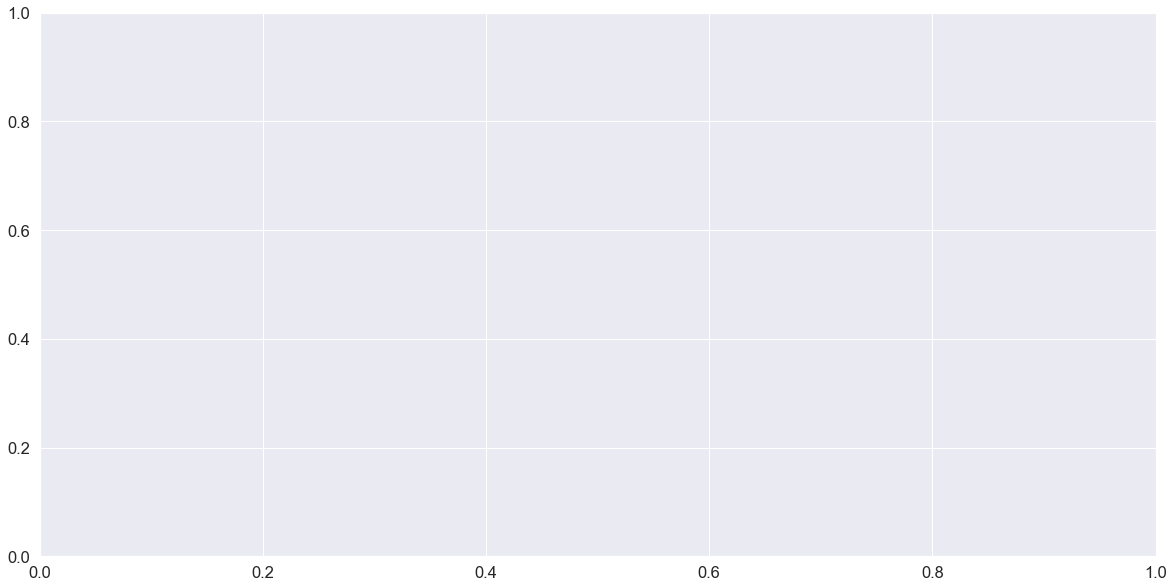

In [32]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax='index',y='label', data=mergedBurglarydataFrame)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

In [33]:
#  count all labels where label ends with -ENTRY:
ENTRY=mergedBurglary[mergedBurglary.label.str.endswith('B-ENTRY')].label.count()
#  COUNT all labels where label ends with B-VTM_LEFT_HOME_TIME:
VTM_LEFT_HOME_TIME=mergedBurglary[mergedBurglary.label.str.endswith('B-VTM_LEFT_HOME_TIME')].label.count()
#  COUNT all labels where label ends with B-NATIVE:
NATIVE=mergedBurglary[mergedBurglary.label.str.endswith('B-NATIVE')].label.count()
#  COUNT all labels where label ends with B-APPEARANCE:
APPEARANCE=mergedBurglary[mergedBurglary.label.str.endswith('B-APPEARANCE')].label.count()
#  COUNT all labels where label ends with B-GENDER:
GENDER=mergedBurglary[mergedBurglary.label.str.endswith('B-GENDER')].label.count()
#  COUNT all labels where label ends with B-LOCATION

In [34]:
LOST_ITEM_TYPE

NameError: name 'LOST_ITEM_TYPE' is not defined

#### All keys

In [35]:
all_data.keys()

dict_keys([])

#### Extract information from the required key and make a dataframe

In [36]:
entities = []
for key, value in all_data.items():
    for annotation in value["annotations"]:
        # add file name to each annotation
        id = key.split(".")[0]
        # add text to each annotation
        text = annotation[0]
        # add entities
        entities_dict = annotation[1]["entities"]
        for entity in entities_dict:
            start = entity[0]
            end = entity[1]
            type = entity[2]
            entities.append([id,text, start, end, type])

df = pd.DataFrame(entities, columns=["Id","Text", "Start", "End", "Type"])

In [37]:
mergedBurglaryminidataFrame.head()

,text,label
4,duplex,B-LOCATION_TYPE
45,0300hrs,B-VTM_LEFT_HOME_TIME
66,At,B-VTM_LEFT_HOME_TIME
76,ransacking.,B-RANSACKING
96,ransacking,B-RANSACKING


In [38]:
#  replace all B- with empty string:
mergedBurglaryminidataFrame['label'] = mergedBurglaryminidataFrame['label'].str.replace('B-','')

C:\Users\user\AppData\Local\Temp\ipykernel_11704\2501099416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedBurglaryminidataFrame['label'] = mergedBurglaryminidataFrame['label'].str.replace('B-','')


AxesSubplot(0.125,0.125;0.775x0.755)


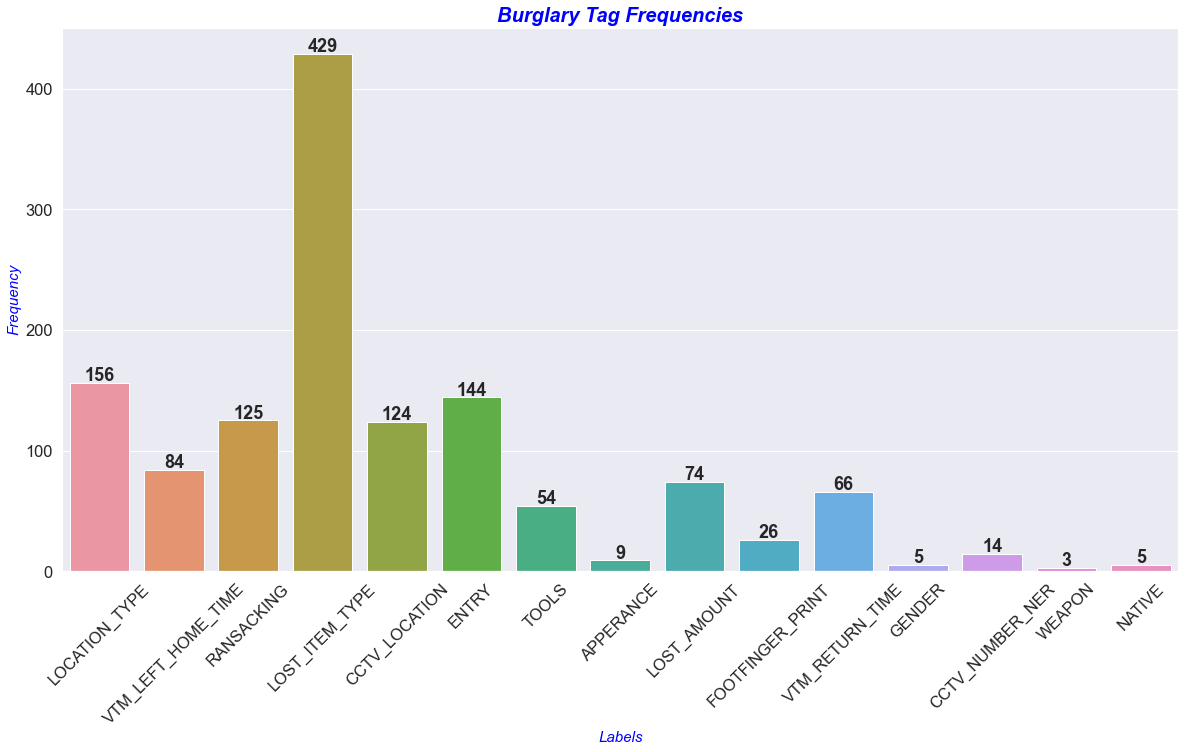

In [39]:
fig, ax1 = plt.subplots(figsize=(20,10))
print(ax1)
graph = sns.countplot(ax=ax1,x='label', data=mergedBurglaryminidataFrame)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2,
        int(height),ha="center",fontweight='bold')
    i += 1
i=0
ax = sns.countplot(x=mergedBurglaryminidataFrame['label'], data=mergedBurglaryminidataFrame)
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, int(p.get_height())), ha='center', va='top', color='black', size=12)
plt.xticks(rotation=45)

plt.title('Burglary Tag Frequencies', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')

plt.show()
# save the figure correctly without any cuttings:

fig.savefig('BurglaryData.png')


AxesSubplot(0.125,0.125;0.775x0.755)
156.0
84.0
125.0
429.0
124.0
144.0
54.0
9.0
74.0
26.0
66.0
5.0
14.0
3.0
5.0


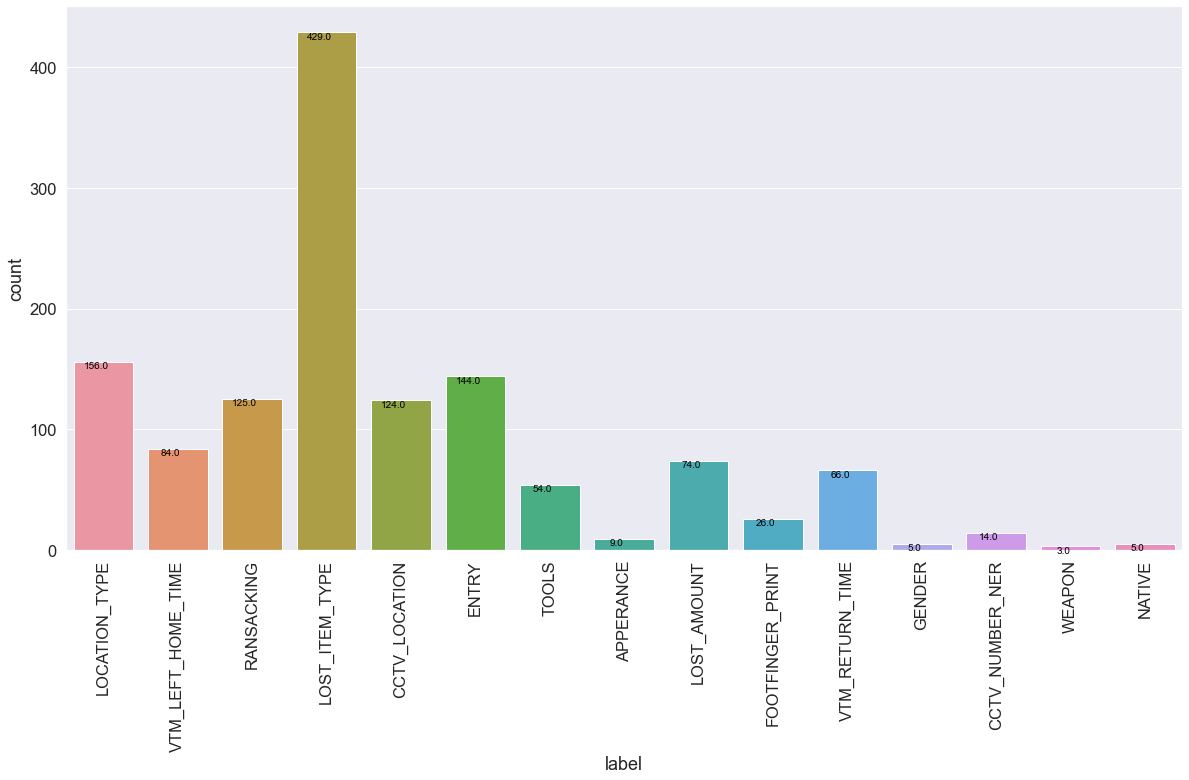

In [72]:
fig, ax1 = plt.subplots(figsize=(20,10))
print(ax1)
#  convert ax1 to list
bx1 = mergedBurglaryminidataFrame['label'].value_counts().tolist()
graph = sns.countplot(ax=ax1,x='label', data=mergedBurglaryminidataFrame)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    print(height)
    graph.text(p.get_x()+0.3, p.get_height() + 0.4,height,ha="center",va='top', color='black', size=10)
    i += 1
# i=0
# ax = sns.countplot(x=mergedBurglaryminidataFrame['label'], data=mergedBurglaryminidataFrame)
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, int(p.get_height())), ha='center', va='top', color='black', size=12)
# plt.xticks(rotation=90)

# plt.title('Burglary Data', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
# plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
# plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')

# plt.show()

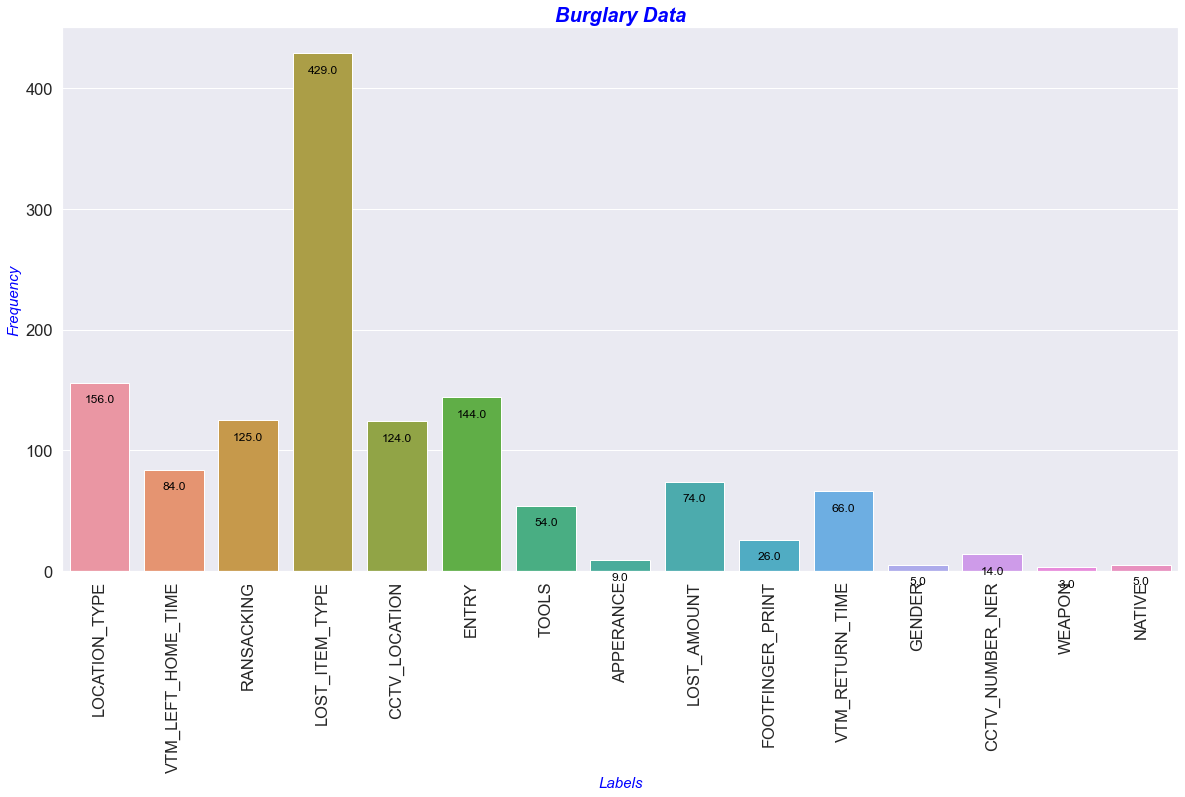

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10)) # adjust the width and height values as needed
ax = sns.countplot(x=mergedBurglaryminidataFrame['label'], data=mergedBurglaryminidataFrame)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, int(p.get_height())), ha='center', va='top', color='black', size=12)
plt.xticks(rotation=90)

plt.title('Burglary Data', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')

plt.show()


In [76]:
counts = mergedBurglaryminidataFrame['label'].value_counts().rename_axis('user').reset_index(name='count')

ax = sns.barplot(x='label', y='count', data=counts)
ax.bar_label(ax.containers[0])

ValueError: Could not interpret input 'label'

# Robbery

In [77]:
mergedRobbery.label.value_counts()

O                        40661
I-ESCAPE_PATH              519
I-HOW_TO_APPROACH_VTM      444
B-LOST_ITEM_TYPES          256
I-FORCE                    226
B-GENDER_OF_THE_AP         209
B-HOW_TO_APPROACH_VTM      182
I-LOST_ITEM_TYPES          160
B-ESCAPE_PATH              150
B-WEAPON                   145
B-LOCATION_TYPE            135
I-LOCATION_TYPE            105
B-TOTAL_LOST_AMOUNT        101
B-GENDER                   100
I-WEAPON                    91
I-VTM_JOB                   84
B-VTM_JOB                   69
B-FORCE                     63
B-ACQUAINTED                58
B-GENDER_OF_THE_VTM         56
B-CCTV_LOCATION             46
I-CCTV_LOCATION             44
B-APPERANCE                 42
B-REG_NO                    34
I-ACQUAINTED                22
B-TOOLS                     19
I-APPERANCE                 17
I-REG_NO                    16
B-LOST_ITEM_TYPE            13
I-LOST_ITEM_TYPE            10
I-TOOLS                      9
B-GENDER_OF_THE VTM          8
B-NATIVE

In [78]:
#  CHANGE b-REG-NO to B-REG-NO
mergedRobbery.loc[mergedRobbery.label == 'B-REG-NO', 'label'] = 'B-REG_NO'


In [79]:
mergedRobbery.loc[mergedRobbery.label == 'I-GENDER', 'text']

6018    he
Name: text, dtype: object

In [80]:
# change I-GENDER to B-GENDER:

mergedRobbery.loc[mergedRobbery.label == 'I-GENDER', 'label']='B-GENDER'

In [81]:
mergedRobbery.loc[mergedRobbery.label == 'I-GENDER_OF_THE_AP', 'text']

4600    males
Name: text, dtype: object

In [82]:
#  change I-GENDER_OF_THE_AP to B-GENDER_OF_THE_AP:
mergedRobbery.loc[mergedRobbery.label=='I-GENDER_OF_THE_AP']='B-GENDER_OF_THE_AP'

In [83]:
mergedRobbery.label.value_counts()

O                        40661
I-ESCAPE_PATH              519
I-HOW_TO_APPROACH_VTM      444
B-LOST_ITEM_TYPES          256
I-FORCE                    226
B-GENDER_OF_THE_AP         210
B-HOW_TO_APPROACH_VTM      182
I-LOST_ITEM_TYPES          160
B-ESCAPE_PATH              150
B-WEAPON                   145
B-LOCATION_TYPE            135
I-LOCATION_TYPE            105
B-TOTAL_LOST_AMOUNT        101
B-GENDER                   101
I-WEAPON                    91
I-VTM_JOB                   84
B-VTM_JOB                   69
B-FORCE                     63
B-ACQUAINTED                58
B-GENDER_OF_THE_VTM         56
B-CCTV_LOCATION             46
I-CCTV_LOCATION             44
B-APPERANCE                 42
B-REG_NO                    35
I-ACQUAINTED                22
B-TOOLS                     19
I-APPERANCE                 17
I-REG_NO                    16
B-LOST_ITEM_TYPE            13
I-LOST_ITEM_TYPE            10
I-TOOLS                      9
B-GENDER_OF_THE VTM          8
B-NATIVE

In [84]:
#  I-CCTV-NUMBER_NER
mergedRobbery.loc[mergedRobbery.label == 'B-CCTV_NUMBER_NER', 'text']

1395      No
2777     one
2780    four
Name: text, dtype: object

In [85]:
#  fill with NA ALL NULLS
mergedRobbery.fillna('NA', inplace=True)

In [86]:
#  GET ALL LABELS WHICH START WITH B-:
# mergedRoberryminidataFrame=mergedRobbery.loc[mergedRobbery.label.str.startswith('B-')]
#  save only those values which starts with B- :
mergedRoberryminidataFrame=mergedRobbery[mergedRobbery['label'].str.startswith('B-')]

In [87]:
#  remove all B- from the labels:
mergedRoberryminidataFrame['label'] = mergedRoberryminidataFrame['label'].str.replace('B-','')

C:\Users\user\AppData\Local\Temp\ipykernel_14528\3710840756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedRoberryminidataFrame['label'] = mergedRoberryminidataFrame['label'].str.replace('B-','')


AxesSubplot(0.125,0.125;0.775x0.755)


NameError: name 'mergedRoberryminidataFrame' is not defined

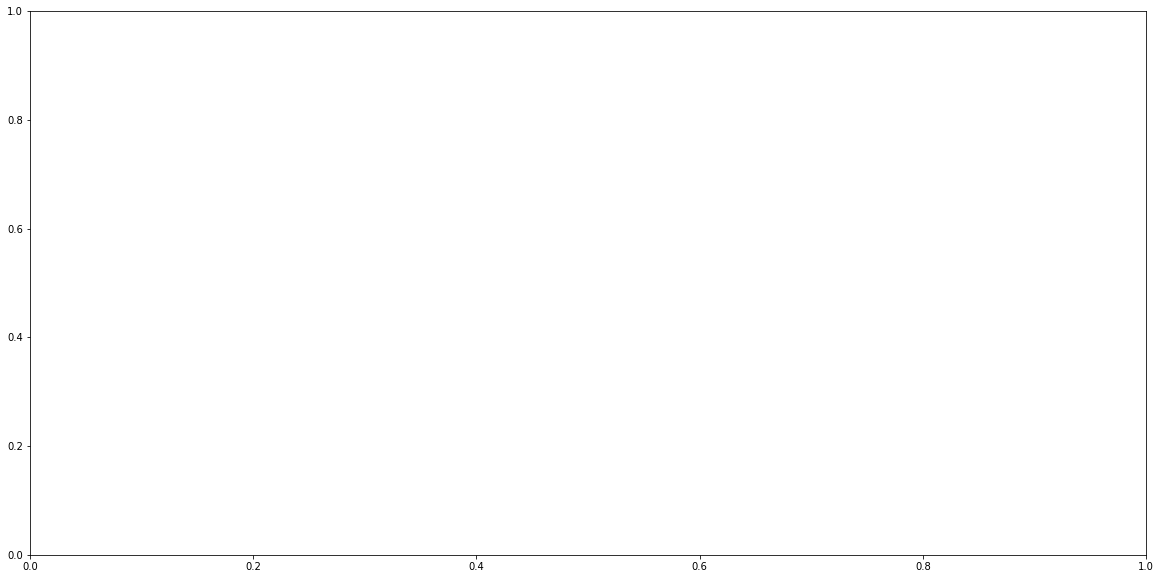

In [29]:
fig, ax1 = plt.subplots(figsize=(20,10))
print(ax1)
graph = sns.countplot(ax=ax1,x='label', data=mergedRoberryminidataFrame)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2,
        int(height),ha="center",fontweight='bold')
    i += 1
i=0
ax = sns.countplot(x=mergedRoberryminidataFrame['label'], data=mergedRoberryminidataFrame)
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, int(p.get_height())), ha='center', va='top', color='black', size=12)
plt.xticks(rotation=90)

plt.title('Robbery Tag Frequencies', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')

plt.show()
# save the figure correctly without any cuttings:



## Further analysis lost item types

In [103]:
imergedRobberydataFrame=mergedRoberryminidataFrame.loc[mergedRoberryminidataFrame.label == 'LOST_ITEM_TYPES'].value_counts().to_frame().reset_index()
# save value_counts to a dataframe:
# robberyLostItemTypes = mergedRoberryminidataFrame.loc[mergedRoberryminidataFrame.label == 'LOST_ITEM_TYPES'].value_counts()
# imergedRobberydataFrame=mergedRoberryminidataFrame.label.value_counts().to_frame().reset_index()


In [104]:
imergedRobberydataFrame

,text,label,0
0,cash,LOST_ITEM_TYPES,52
1,mobile,LOST_ITEM_TYPES,19
2,gold,LOST_ITEM_TYPES,11
3,bank,LOST_ITEM_TYPES,11
4,handbag,LOST_ITEM_TYPES,9
...,...,...,...
92,VTM's,LOST_ITEM_TYPES,1
93,S/ppty8-9.,LOST_ITEM_TYPES,1
94,S/ppty2.,LOST_ITEM_TYPES,1
95,"S/ppty2-7),",LOST_ITEM_TYPES,1


In [97]:
#  draw a pie chart for text:
fig, ax1 = plt.subplots(figsize=(20,10))



robberyLostItemTypes.columns

['label', 'text', 'count']

In [100]:
# show the count column only:
robberyLostItemTypes['label']

KeyError: 'label'

# Deception

In [46]:
mergedDeception.head()

,0,1
0,-DOCSTART- -X- O O,NaN
1,VTM,O
2,owned,O
3,one,O
4,BOC,B-RELATED_BANK


In [47]:
#  set column names
mergedDeception.columns = ['text', 'label']
mergedDeception.label.value_counts()

O                               9591
I-METHOD                         285
B-AMOUNT                         177
B-MEANS                          126
B-METHOD                         117
I-TRANSACTION_MEANS              115
B-CHANNEL                         94
I-BEHAVIOUR                       82
I-HOW_PROPERTY_IS_TAKEN_AWAY      78
B-TRANSACTION_MEANS               78
B-HOW_PROPERTY_IS_TAKEN_AWAY      63
B-BEHAVIOUR                       54
I-AMOUNT                          51
I-MEANS                           50
B-RELATED_BANK                    46
B-GENDER                          45
I-LOC                             43
B-FREQUENCY                       35
I-CHANNEL                         30
B-TYPES                           18
I-TYPES                           16
B-LOC                             15
I-FREQUENCY                       13
B-LOG_TYPE                        13
B-BEHAVIOUR-                       9
B-NUMBER_OF_OCCURRENCE             9
I-BEHAVIOUR-                       9
I

In [48]:
# BHOW_PROPERTY_IS_TAKEN_AWAY
mergedDeception.loc[mergedDeception.label == 'BHOW_PROPERTY_IS_TAKEN_AWAY', 'text']

1053    Alipay
Name: text, dtype: object

In [49]:
# change BHOW_PROPERTY_IS_TAKEN_AWAY to B-HOW_PROPERTY_IS_TAKEN_AWAY
mergedDeception.loc[mergedDeception.label == 'BHOW_PROPERTY_IS_TAKEN_AWAY', 'label'] = 'B-HOW_PROPERTY_IS_TAKEN_AWAY'

In [50]:
# change IHOW_PROPERTY_IS_TAKEN_AWAY to B-HOW_PROPERTY_IS_TAKEN_AWAY
mergedDeception.loc[mergedDeception.label == 'IHOW_PROPERTY_IS_TAKEN_AWAY', 'label'] = 'I-HOW_PROPERTY_IS_TAKEN_AWAY'

In [51]:
mergedDeception.loc[mergedDeception.label == 'I-METHOS', 'label'] = 'I-METHOD'

In [52]:
mergedDeception.loc[mergedDeception.label == 'B-BEHAVIOR', 'label'] = 'B-BEHAVIOUR'

In [53]:
mergedDeception.loc[mergedDeception.label == 'B-MEANS-MEANS', 'label'] = 'B-MEANS'

In [54]:
mergedDeception.loc[mergedDeception.label == 'I-TITLE', 'text']

281    Scam)
Name: text, dtype: object

In [55]:
mergedDeception.loc[mergedDeception.label == 'I-NATIVE', 'text']

953    Kong.
Name: text, dtype: object

In [56]:
#  fill with NA ALL NULLS
mergedDeception.fillna('NA', inplace=True)


In [57]:
#  TAKE ALL ROWS WHICH START WITH B-:
mergedDeceptionminidataFrame=mergedDeception[mergedDeception['label'].str.startswith('B-')]

In [58]:
mergedDeceptionminidataFrame.label.value_counts()

B-AMOUNT                        177
B-MEANS                         127
B-METHOD                        117
B-CHANNEL                        94
B-TRANSACTION_MEANS              78
B-HOW_PROPERTY_IS_TAKEN_AWAY     64
B-BEHAVIOUR                      55
B-RELATED_BANK                   46
B-GENDER                         45
B-FREQUENCY                      35
B-TYPES                          18
B-LOC                            15
B-LOG_TYPE                       13
B-BEHAVIOUR-                      9
B-NUMBER_OF_OCCURRENCE            9
B-NATIVE                          4
B-TYPE_OF_VTM                     2
B-OFFENCE                         2
Name: label, dtype: int64

In [59]:
# change B- to empty string:
mergedDeceptionminidataFrame['label'] = mergedDeceptionminidataFrame['label'].str.replace('B-','')

C:\Users\user\AppData\Local\Temp\ipykernel_11704\730887885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mergedDeceptionminidataFrame['label'] = mergedDeceptionminidataFrame['label'].str.replace('B-','')


AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 1440x720 with 0 Axes>

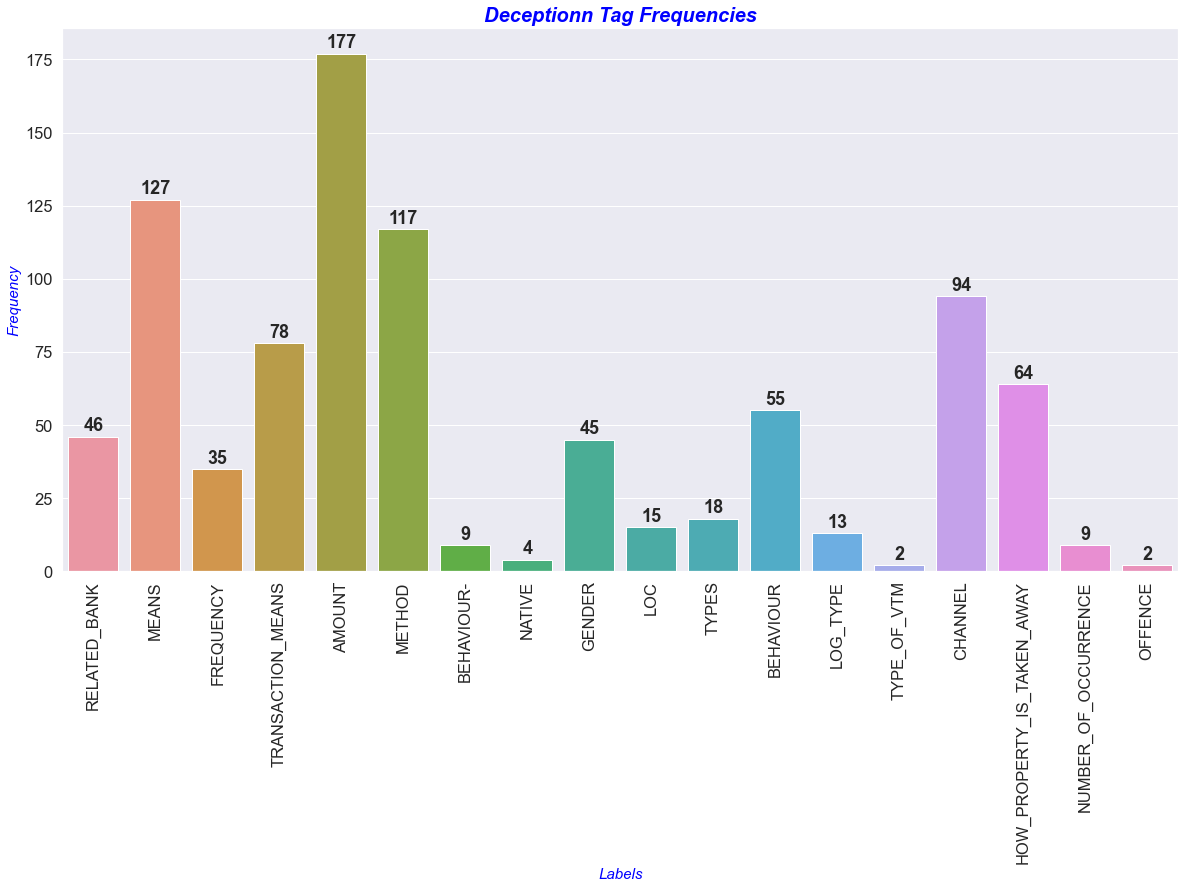

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(20,10))
print(ax1)
graph = sns.countplot(ax=ax1,x='label', data=mergedDeceptionminidataFrame)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2,
        int(height),ha="center",fontweight='bold')
    i += 1
i=0

ax = sns.countplot(x=mergedDeceptionminidataFrame['label'], data=mergedDeceptionminidataFrame)
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, int(p.get_height())), ha='center', va='top', color='black', size=12)
plt.xticks(rotation=90)

plt.title('Deceptionn Tag Frequencies', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')
plt.show()


AxesSubplot(0.125,0.125;0.775x0.755)


NameError: name 'mergedDeceptionminidataFrame' is not defined

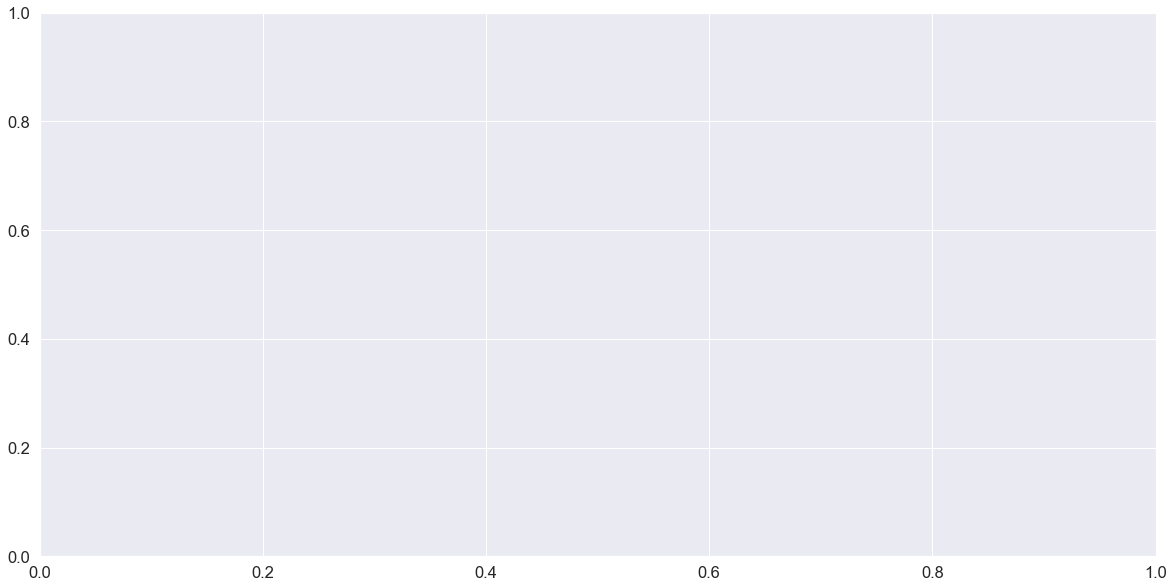

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax1 = plt.subplots(figsize=(20,10))
print(ax1)
graph = sns.countplot(ax=ax1,x='label', data=mergedDeceptionminidataFrame)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2,
        int(height),ha="center",fontweight='bold')
    i += 1
i=0
ax = sns.countplot(x=mergedDeceptionminidataFrame['label'], data=mergedDeceptionminidataFrame)
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, int(p.get_height())), ha='center', va='top', color='black', size=12)
plt.xticks(rotation=90)

plt.title('Deception Tag Frequencies', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')

# plt.show()
# i=0
# ax = sns.countplot(x=mergedRoberryminidataFrame['label'], data=mergedRoberryminidataFrame)
# # for p in ax.patches:
# #     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, int(p.get_height())), ha='center', va='top', color='black', size=12)
# plt.xticks(rotation=90)

# plt.title('Robbery Tag Frequencies', color='blue', fontsize=20, fontweight='bold', fontstyle='italic')
# plt.xlabel('Labels', color='blue', fontsize=15, fontstyle='italic')
# plt.ylabel('Frequency', color='blue', fontsize=15, fontstyle='italic')

# plt.show()
# # save the figure correctly without any cuttings:
plt.show


In [30]:
#  CHANNEL value counts:
mergedDeception.loc[mergedDeception.label == 'B-TRANSACTION_MEANS'].value_counts()


text         label              
FPS          B-TRANSACTION_MEANS    17
bank         B-TRANSACTION_MEANS    16
online       B-TRANSACTION_MEANS     3
credit       B-TRANSACTION_MEANS     3
handed       B-TRANSACTION_MEANS     3
AliPay       B-TRANSACTION_MEANS     2
residence    B-TRANSACTION_MEANS     2
became       B-TRANSACTION_MEANS     2
did          B-TRANSACTION_MEANS     2
fraudulent   B-TRANSACTION_MEANS     1
buying       B-TRANSACTION_MEANS     1
four         B-TRANSACTION_MEANS     1
$4,500-HKD   B-TRANSACTION_MEANS     1
iTune        B-TRANSACTION_MEANS     1
activation   B-TRANSACTION_MEANS     1
loan         B-TRANSACTION_MEANS     1
money        B-TRANSACTION_MEANS     1
piano.       B-TRANSACTION_MEANS     1
immediately  B-TRANSACTION_MEANS     1
WP1          B-TRANSACTION_MEANS     1
ZA           B-TRANSACTION_MEANS     1
Hong         B-TRANSACTION_MEANS     1
Alipay       B-TRANSACTION_MEANS     1
Amazon       B-TRANSACTION_MEANS     1
Chong        B-TRANSACTION_MEAN